# Group: 047
# Members: 

 - Nipun Gupta (2021fc04426)
 - Aiswarya S Parvathi (2021fc04430) 
 - Vengadesh S (2021fc04424)
 
# Machine Learning Assignment 2 PS9 - Heart Disease Prediction

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset as dataframe using pandas library

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


The above output displays 2 rows of the dataset.

Attribute Information:

1. ) age

2. ) sex

3. ) cp (chest pain type) (4 values)

4. ) trestbps (resting blood pressure)

5. ) chol (serum cholestoral in mg/dl)

6. ) fbs (fasting blood sugar) > 120 mg/dl

7. ) restecg (resting electrocardiographic results) (values 0,1,2)

8. ) thalach (maximum heart rate achieved)

9. ) exang (exercise induced angina)

10. ) oldpeak = ST depression induced by exercise relative to rest

11. ) the slope of the peak exercise ST segment

12. ) ca - number of major vessels (0-3) colored by flourosopy

13. ) thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

14. ) target - is the binary target variable, 0 indicates that the patient has heart disease, the value is 1 if not

# Data Visualization and Exploration

### Checking for class imbalance

In [4]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

### Plotting a count of the **target** column

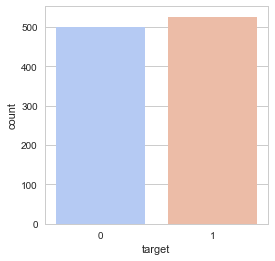

In [5]:
plt.figure(figsize=(4,4))
sns.set(style='whitegrid', color_codes=True)
sns.countplot(x='target', data=df, palette='coolwarm')

The above results show that the dataset is quite balanced

### Pie chart showing percentage distribution of the target variable

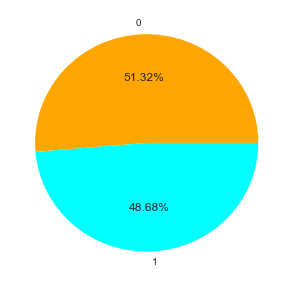

In [6]:
plt.figure(figsize=(5,5))
plt.pie(df['target'].value_counts(), labels=df['target'].unique(), autopct='%0.2f%%', colors = ['orange', 'cyan'])
plt.show()

### Extracting continuous features from the dataframe

In [7]:
continuous_features = [feature for feature in df.select_dtypes(np.number).columns if feature not in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]

In [8]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

For selecting the features, only those features have been considered which have non categorical numerical values

### Visualizations to get an insight about the dataset

Plotting Boxplots to check for univariate outliers

In [9]:
def create_boxplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(10,10))
        plt.subplot(2,2,1)
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        sns.boxplot(x=dataset['target'], y=dataset[feature], data=dataset, hue='target', color='orange')
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

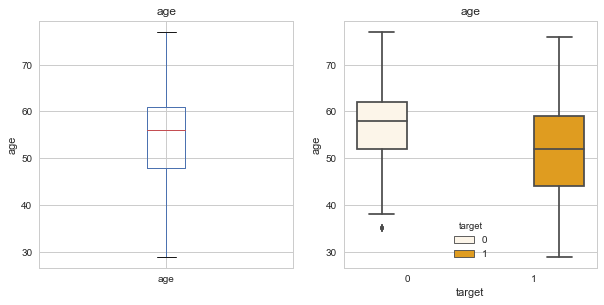

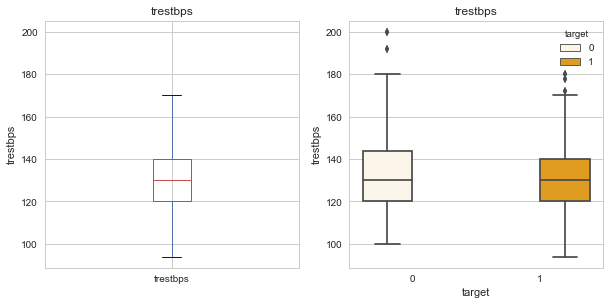

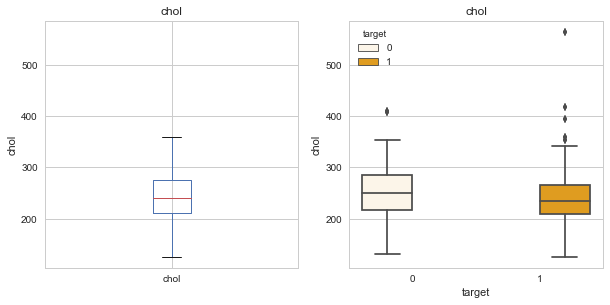

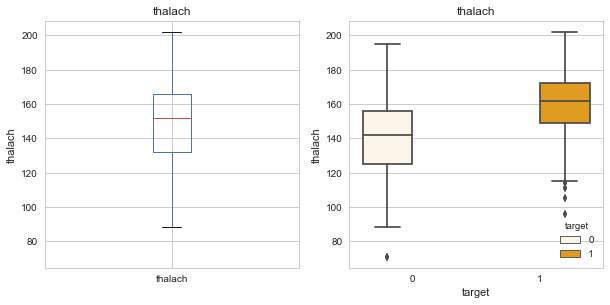

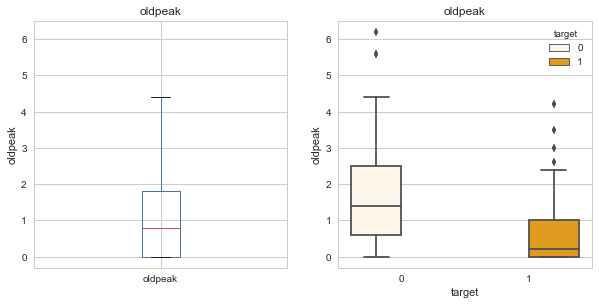

In [10]:
create_boxplots(df, continuous_features)

The boxplots reveal that all the considered attributes have outliers

### Plotting histograms and distplots

In [11]:
def create_histograms_distplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(8,8))
        plt.subplot(2,2,1)
        plt.hist(dataset[feature].dropna())
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        sns.distplot(df[feature])
        plt.xlabel(feature)
        plt.show()

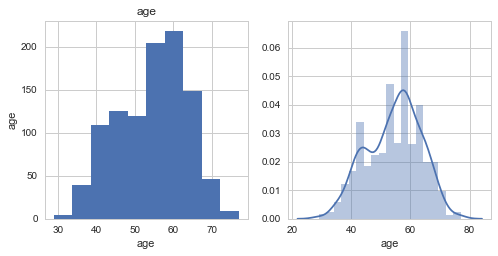

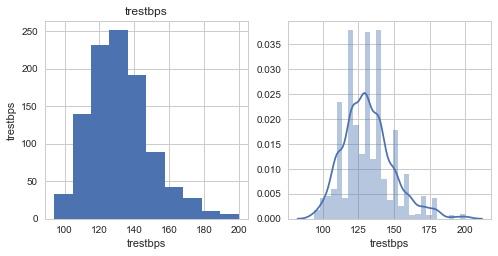

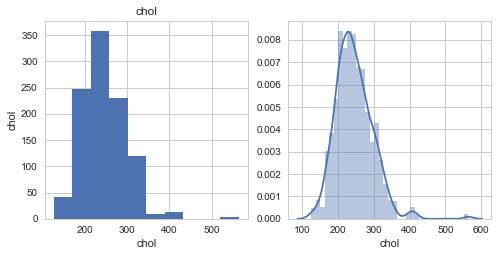

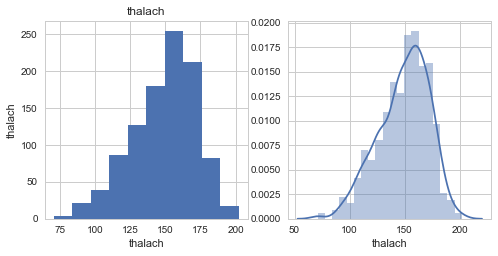

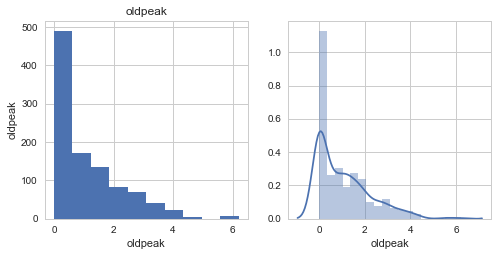

In [12]:
create_histograms_distplots(df, continuous_features)

The histograms and distplots reveal where the majority values are concentrated and in which direction is the atrribute skewed.

The features **trestbps**, **chol** and **oldpeak** are positively skewed

The feature **age** and **thalach** are negatively skewed

### Correlation analysis

In [13]:
df[continuous_features].corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.271121,0.219823,-0.390227,0.208137
trestbps,0.271121,1.000000,0.127977,-0.039264,0.187434
chol,0.219823,0.127977,1.000000,-0.021772,0.064880
thalach,-0.390227,-0.039264,-0.021772,1.000000,-0.349796
oldpeak,0.208137,0.187434,0.064880,-0.349796,1.000000


### Plotting Heatmap to perform correlation analysis

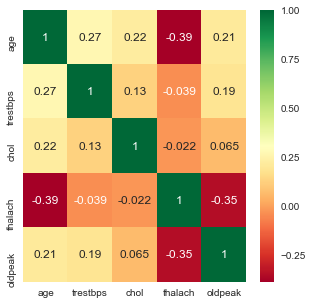

In [14]:
plt.figure(figsize=(5,5))
sns.heatmap(df[continuous_features].corr(), annot=True, cmap="RdYlGn")

The correlation analysis using heatmap shows values of **pearson correlation coefficient** for the respective combinations of the features. The pearson correlation coefficient varies from **-1 to 1**. The stronger the negative value, the more inversely related are the features. The stronger the positive value, the stronger the direct relationship between the features. A value of zero means the features are independent of each other.

The correlation analysis will have effect on the **feature selection**. The combination of features which are strongly and directly related to each other need to be considered. One of such features can be dropped as all of such features will have the same impact on the target feature.

It can be observed that none of the features are strongly related to one another.

## Obtaining the list of categorical features

In [15]:
categorical_features = [feature for feature in df.select_dtypes(np.number).columns if feature in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']]

In [16]:
categorical_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

### Value counts and Countplots to check the distribution of categorical variables

In [17]:
def counts(dataset, feature_list):
    for feature in feature_list:
        print("Value count for feature:", feature)
        print(dataset[feature].value_counts())
        print()
        print("Countplot for feature:", feature)
        plt.figure(figsize=(4,4))
        plt.subplot(1,1,1)
        sns.countplot(feature, data = dataset, hue='target', palette='Greys')
        plt.show()
        print()

Value count for feature: sex
1    713
0    312
Name: sex, dtype: int64

Countplot for feature: sex


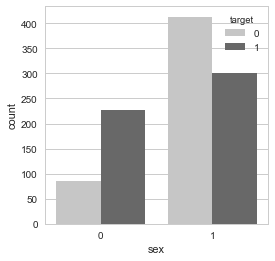


Value count for feature: cp
0    497
2    284
1    167
3     77
Name: cp, dtype: int64

Countplot for feature: cp


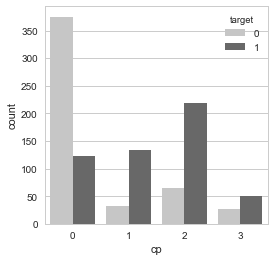


Value count for feature: fbs
0    872
1    153
Name: fbs, dtype: int64

Countplot for feature: fbs


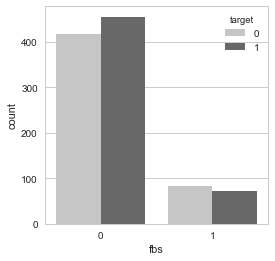


Value count for feature: restecg
1    513
0    497
2     15
Name: restecg, dtype: int64

Countplot for feature: restecg


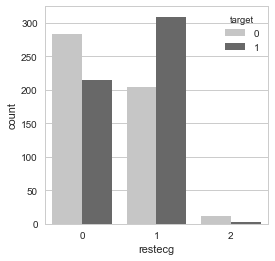


Value count for feature: exang
0    680
1    345
Name: exang, dtype: int64

Countplot for feature: exang


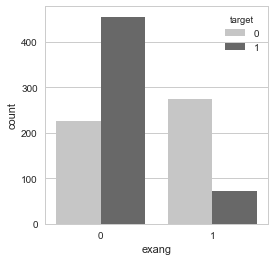


Value count for feature: slope
1    482
2    469
0     74
Name: slope, dtype: int64

Countplot for feature: slope


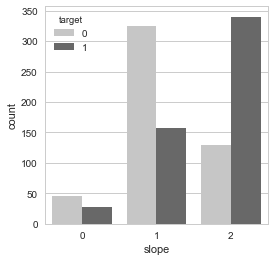


Value count for feature: ca
0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

Countplot for feature: ca


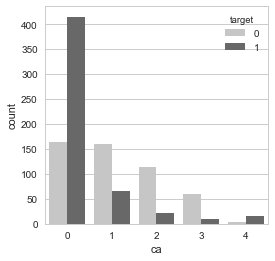


Value count for feature: thal
2    544
3    410
1     64
0      7
Name: thal, dtype: int64

Countplot for feature: thal


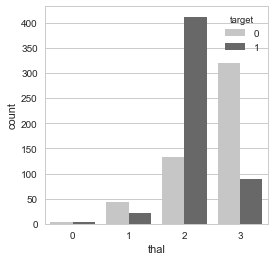

In [18]:
counts(df, categorical_features)

From the above **countplots**, the following conclusions can be made:

 - there are **713** males and **312** females. Amongst the males, around **400** have a heart disease. Amongst the females,   around **75** have a heart disease
 
 
 - the people with **chest pain type-0** have the maximum chance of a heart disease while the people with other **chest pain typess** have less chance of a heart disease. There are 497 people having **chest pain type-0** out of which more than **350** people have a heart disease
 
 
 - There are **872** people having **fbs** or **fasting blood sugar** level more than **120 mg/dl**. Out of these people, more than **400** have a heart disease.
 
 
 - For the **resting electrocardiographic result (restecg)** feature, there are **497** people with **restecg** result **0** and **513** people with **restecg** result **1**.
 
 
  - For the **exercise induced angina (exang)** feature, there are close to 300 people with **exang** as **1** having a heart disease. This could mean that people having **exang** as **1** have a high risk of a heart disease
  
  
   - For the **slope** feature, the poeple with slope as 1 have a high risk of heart diease
   
   
   - For the **ca** feature, the people with ca as 1 have a low risk of a heart diease whereas people with ca type as 3 have a slight risk of a heart while thal type 0 and 1 are less commonly observed in people
   
   
   - For the **thal** feature, the people with thal as 2 have a low risk of a heart diease whereas people with ca type as 1, 2 and 3 have a high risk of a heart while ca type 4 is less commonly observed in people

## Plotting jointplots

In [19]:
def create_jointplots(dataset, feature_list):
    for feature in feature_list:
        for bivariate_feature in feature_list:
            if feature != bivariate_feature:
                sns.jointplot(x=feature, y=bivariate_feature, data=dataset, kind='hex')

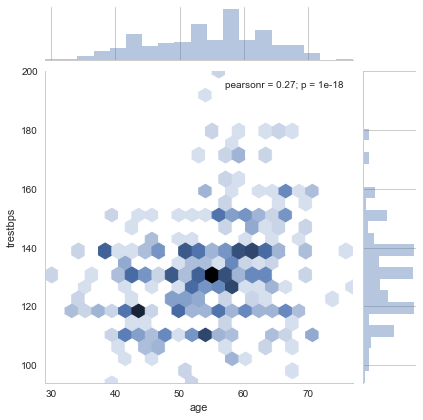

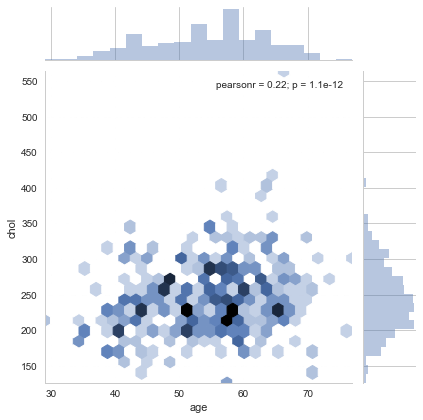

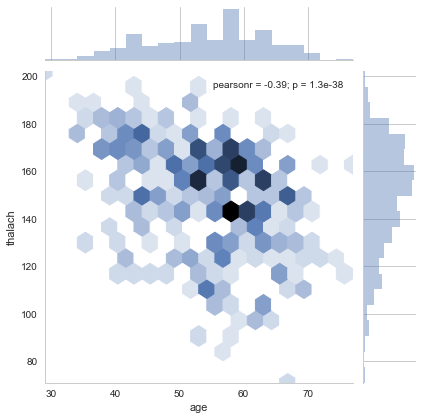

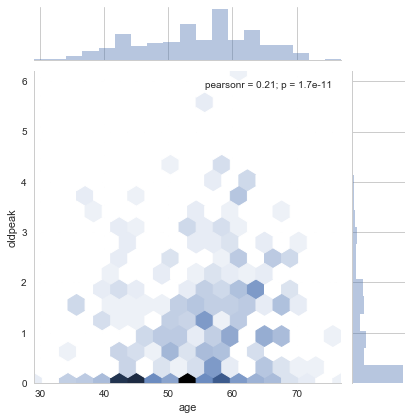

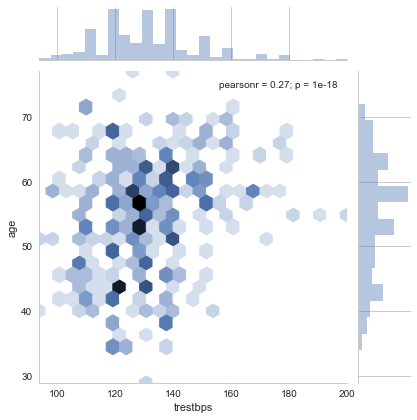

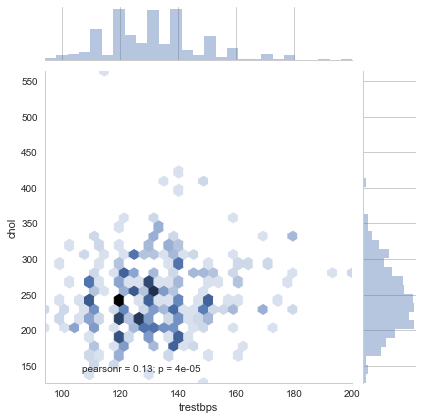

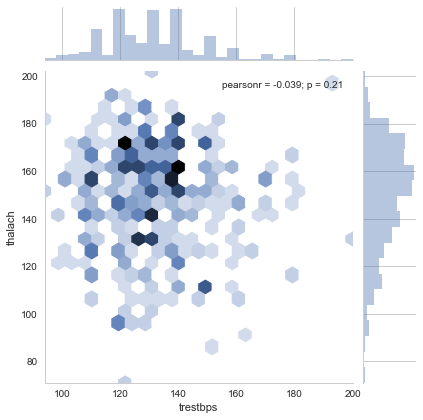

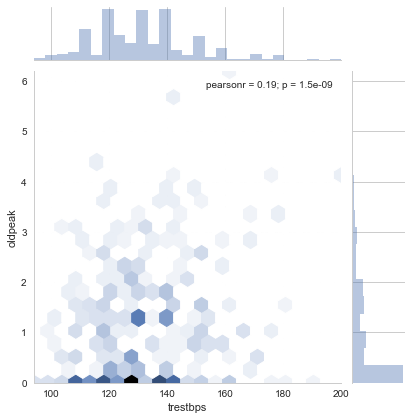

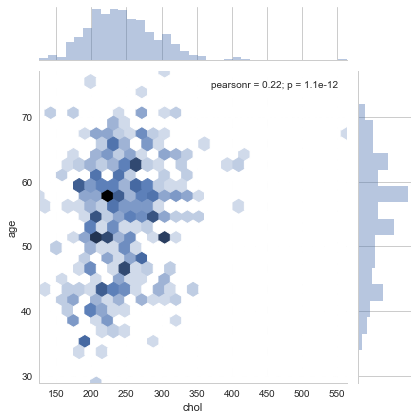

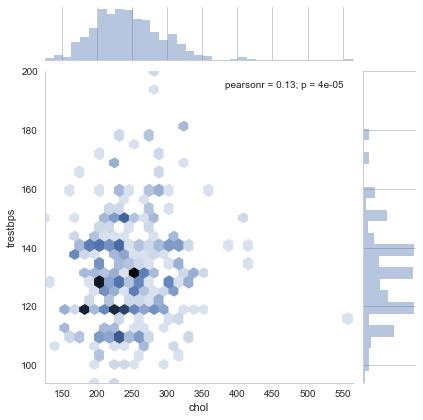

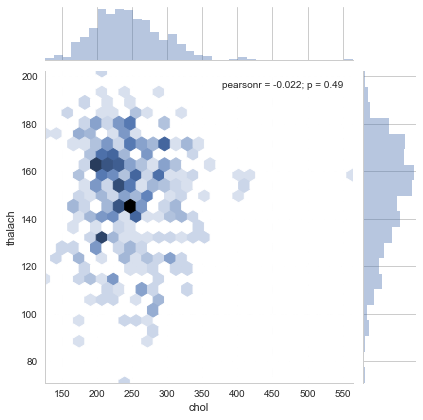

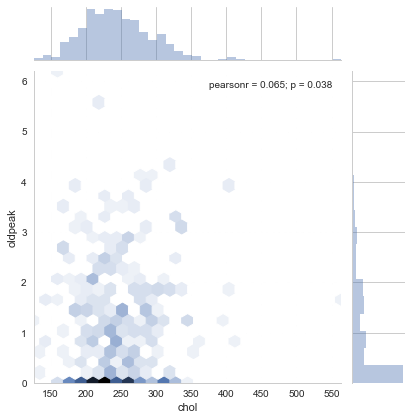

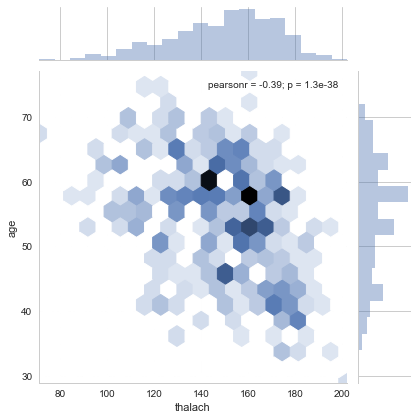

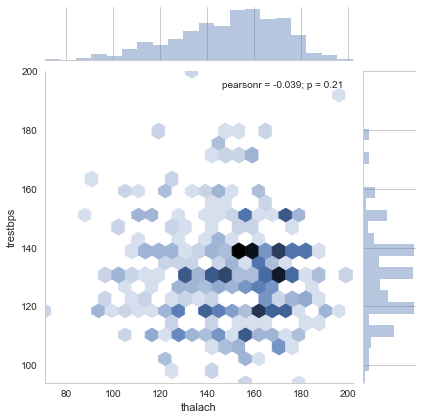

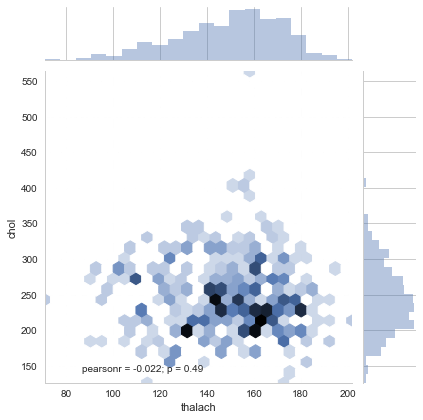

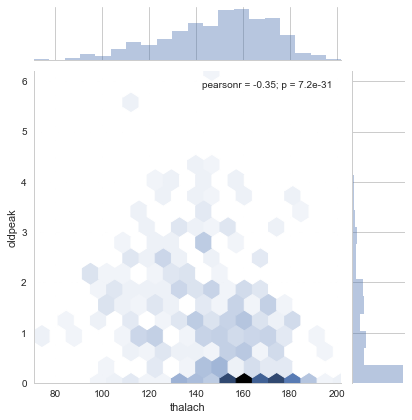

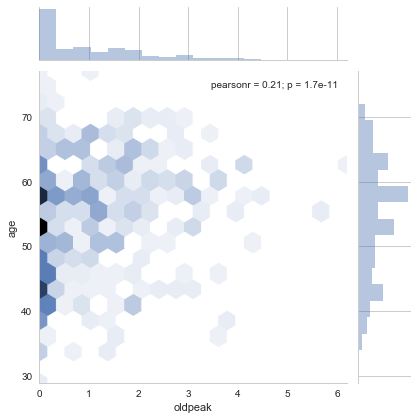

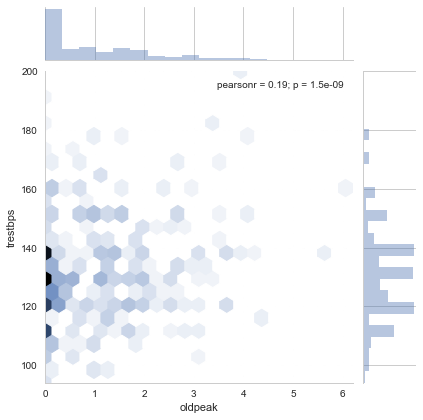

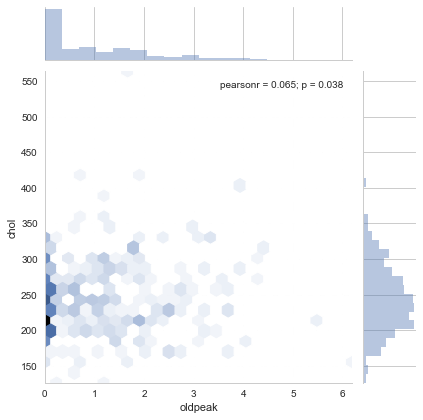

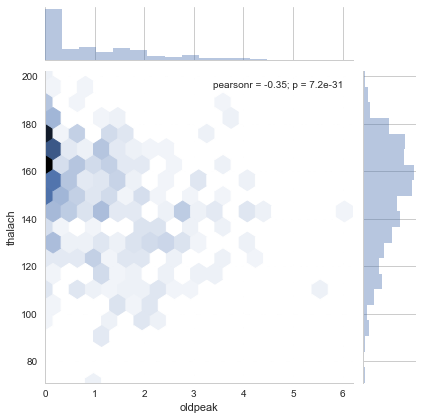

In [20]:
create_jointplots(df, continuous_features)

For the above **hexplots**, the darker color means regions of higher concentration of data points

## Plotting FacetGrid

In [21]:
def create_FacetGrid(dataset, feature_list):
    for feature in feature_list:
        v = sns.FacetGrid(dataset, col='target', row='sex')
        v.map(plt.hist, feature)

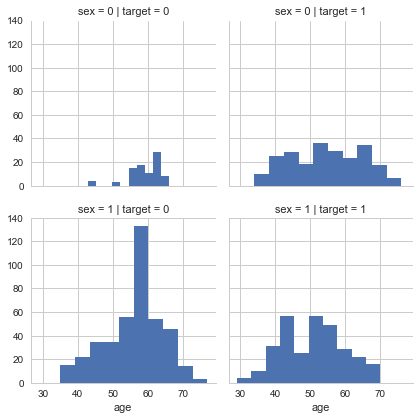

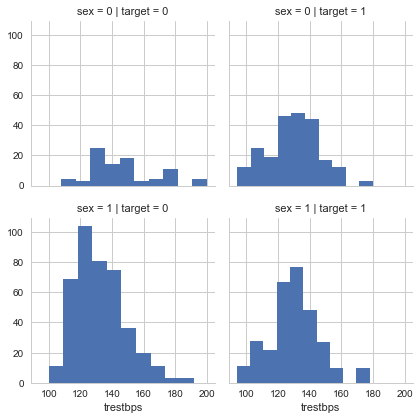

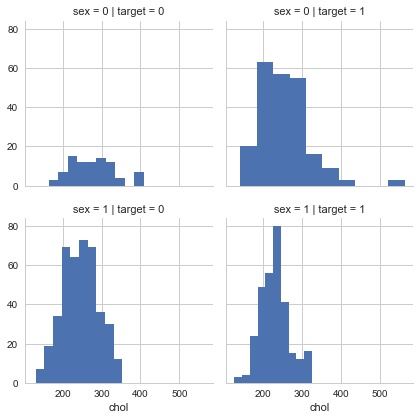

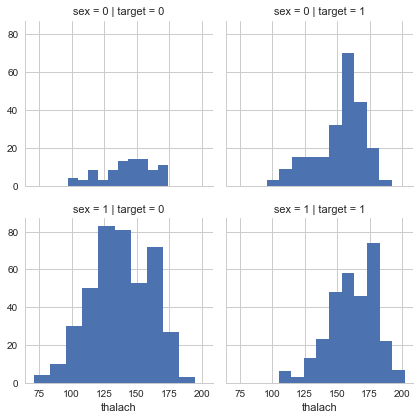

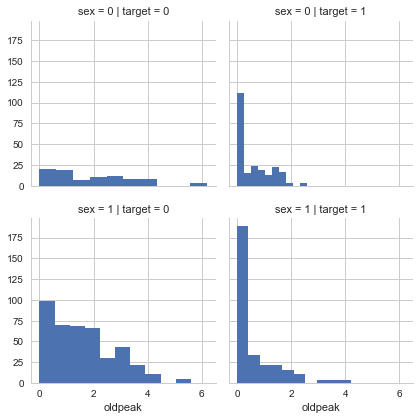

In [22]:
create_FacetGrid(df, continuous_features)

Conclusions drawn from the above **FacetGrids** :

 - There are a lot of **males** in the **age** bracket of **55-60** who have a heart disease
 
 
 - There are a lot of **males** having a heart diease with **trestbps** ranging from **120-130**
 
 
 - There are a lot of **males** having a heart diease with **chol** ranging from **200-280** approx
 
 
 - There are a lot of **males** having a heart diease with **thalach** ranging from **125-170**


 - There are a lot of **healthy males** and **females** with **oldpeak** ranging from **0 - 0.1**

### Determine the median values of the respective attributes for the target classes

In [23]:
pd.pivot_table(df, index='target', values=['age', 'trestbps', 'thalach', 'oldpeak', 'chol'], aggfunc='median')

,age,chol,oldpeak,thalach,trestbps
target,,,,,
0,58.0,249.0,1.4,142.0,130.0
1,52.0,234.0,0.2,161.5,130.0


The above **pivot table** shows the median values of the respective continuous features for the 2 target classes. The following conclusions can be drawn :

 - Median **age** of people having a heart disease is **58** while Median **age** of people not having a heart disease is **52**
 
 
 - Median **cholestrol level** of people having a heart disease is **249** while Median **cholestrol level** of people not having a heart disease is **234**. 
 
 
 - Median **oldpeak** of people having a heart disease is **1.4** while Median **oldpeak** of people not having a heart disease is **0.2** and so it can be inferred that people having high **oldpeak** value have a high risk of a heart disease
 
 
 - Median **thalach** of people having a heart disease is **142** while Median **thalach** of people not having a heart disease is **161.5**
 
 
 - Median **trestbps** of people both having a heart disease and not having a heart disease is **130**

### Determine the median values of the respective attributes between males and females

In [24]:
pd.pivot_table(df, index='sex', values=['age', 'trestbps', 'thalach', 'oldpeak', 'chol'], aggfunc='median')

,age,chol,oldpeak,thalach,trestbps
sex,,,,,
0,57.0,254.0,0.6,155.5,132.0
1,55.0,234.0,0.8,150.0,130.0


From the above pivot table, it can be concluded that the **cholestrol level** is comparatively quite higher in females than in males. This means that as far as **cholestrol levels** are considered, the females are at a higher risk of a heart disease and thus need to keep the **cholestrol level** in check

In [25]:
df.groupby(['sex', 'cp', 'target'])[['target']].count().sort_values(['sex','target']).rename(columns={'target':'Head Count'})

Head Count
sex cp target            
0   2  0                4
    1  0                7
    3  1               13
    1  1               50
    0  1               58
       0               75
    2  1              105
1   1  0               26
    3  0               26
       1               38
    2  0               61
    0  1               64
    1  1               84
    2  1              114
    0  0              300

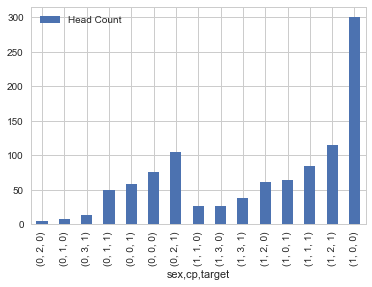

In [26]:
df.groupby(['sex', 'cp', 'target'])[['target']].count().sort_values(['sex','target']).rename(columns={'target':'Head Count'}).plot(kind='bar')

The above result shows count of people with and without a heart disease based on **sex** and **cp**

In [27]:
df.groupby(['sex', 'fbs', 'target'])[['target']].count().rename(columns={'target':'Head Count'})

Head Count
sex fbs target            
0   0   0               63
        1              207
    1   0               23
        1               19
1   0   0              354
        1              248
    1   0               59
        1               52

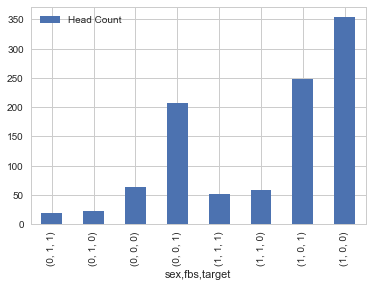

In [28]:
df.groupby(['sex', 'fbs', 'target'])[['target']].count().sort_values(['sex','target']).rename(columns={'target':'Head Count'}).plot(kind='bar')

The above result shows count of people with and without a heart disease based on **sex** and **fbs**

In [29]:
df.groupby(['sex', 'restecg', 'target'])[['target']].count().rename(columns={'target':'Head Count'})

Head Count
sex restecg target            
0   0       0               48
            1               96
    1       0               30
            1              127
    2       0                8
            1                3
1   0       0              235
            1              118
    1       0              174
            1              182
    2       0                4

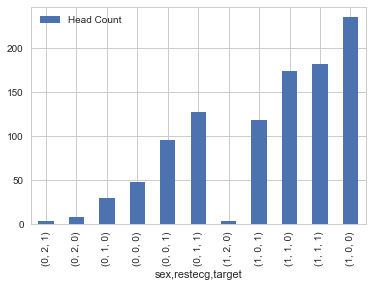

In [30]:
df.groupby(['sex', 'restecg', 'target'])[['target']].count().sort_values(['sex','target']).rename(columns={'target':'Head Count'}).plot(kind='bar')

The above result shows count of people with and without a heart disease based on **sex** and **restecg**

During the training phase, the ML model should know only about the training data. But if the model gets to know about the test data during the training phase, then this is called data leakage.

So we should perform splitting of the dataset before applying feature engineering. After splitting, we will first apply feature engineering for the training data and then apply it on to the test data. This will help to reduce data leakage and overfitting.

## Train Test split

Importing **train_test_split**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [33]:
X.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3


In [34]:
Y.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [35]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X,Y,test_size=0.1, random_state=50)

Since we have less records, we can set training data size = 90% and test data size = 10% so that there is more data for training the predictive model

In [36]:
x_train1.shape

(922, 13)

In [37]:
x_test1.shape

(103, 13)

In [38]:
y_train1.shape

(922,)

In [39]:
y_test1.shape

(103,)

In [40]:
df_train = x_train1.join(y_train1, how='inner')

In [41]:
df_train.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
769,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
626,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
858,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1


In [42]:
df_test = x_test1.join(y_test1, how='inner')

In [43]:
df_test.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
365,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
737,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1


## Data Preprocessing and cleaning

### Checking for the presence of duplicates

In [44]:
df_train.duplicated().sum()

620

It can observed that there are **620 duplicate rows** in the dataset

In [45]:
#Removing the duplicates but retaining only the first instance of the duplicate row
df_train = df_train.drop_duplicates(keep='first')

In [46]:
df_train.duplicated().sum()

0

There are no more duplicate rows present in the dataset

Identifying missing values

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 769 to 4
Data columns (total 14 columns):
age         302 non-null int64
sex         302 non-null int64
cp          302 non-null int64
trestbps    302 non-null int64
chol        302 non-null int64
fbs         302 non-null int64
restecg     302 non-null int64
thalach     302 non-null int64
exang       302 non-null int64
oldpeak     302 non-null float64
slope       302 non-null int64
ca          302 non-null int64
thal        302 non-null int64
target      302 non-null int64
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [48]:
df_train.shape

(302, 14)

The shape of the dataframe shows that there 302 rows in the dataset and 14 columns/features

In [49]:
df_train[continuous_features].describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


In [50]:
df_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

It can be observed that now there are no missing values

#### Handling outliers

We had earlier concluded that there were outliers in the dataset. We will now handle these outliers by using concept of Interquartile range

In [51]:
def remove_outliers(dataset, list_of_features):
    for feature in list_of_features:
        IQR = dataset[feature].quantile(0.75)-df[feature].quantile(0.25)
        lower_bridge = dataset[feature].quantile(0.25) - IQR*(1.5)
        upper_bridge = dataset[feature].quantile(0.75) + IQR*(1.5)
        dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
        dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge

In [52]:
remove_outliers(df_train, continuous_features)

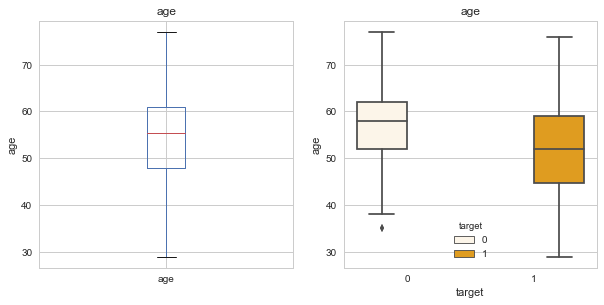

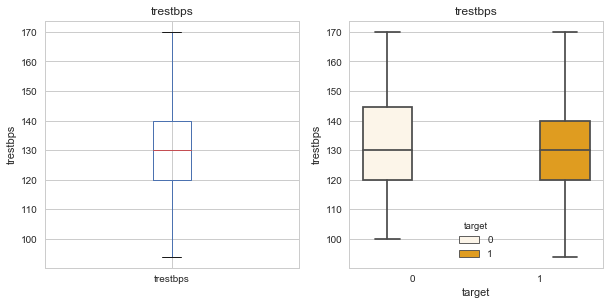

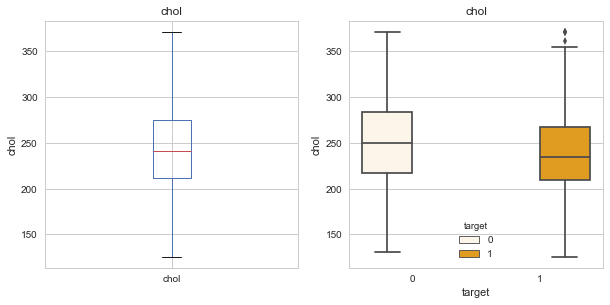

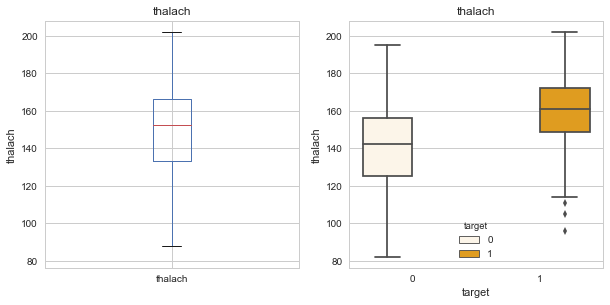

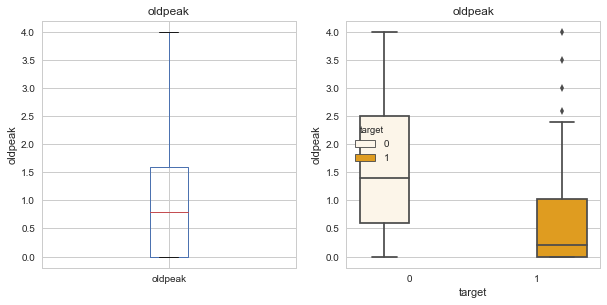

In [53]:
create_boxplots(df_train, continuous_features)

The outliers have been treated

### Handling Skewness

In [54]:
from scipy.stats import skew

In [55]:
for feature in continuous_features:
    print(feature, " ", skew(df_train[feature]))

age   -0.20272991021357126
trestbps   0.387936484227469
chol   0.33402983912633294
thalach   -0.4926836884881999
oldpeak   0.9889531970719395


From the skewness scores, histograms and the distplots, it can be observed that the feature **oldpeak** is quite highly skewed. We will convert this into normal distribution using **square root transformation**

In [56]:
df_train['oldpeak'] = np.sqrt(df_train['oldpeak'])

In [57]:
for feature in continuous_features:
    print(feature, " ", skew(df_train[feature]))

age   -0.20272991021357126
trestbps   0.387936484227469
chol   0.33402983912633294
thalach   -0.4926836884881999
oldpeak   0.09960302678558708


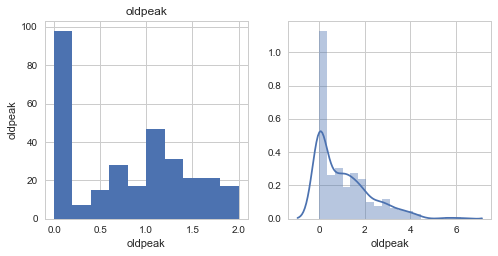

In [58]:
create_histograms_distplots(df_train, ['oldpeak'])

### Checking for the presence of multivariate outliers using scatterplot

In [59]:
def create_scatterplots(dataset, feature_list):
    for feature in feature_list:
        for bivariate_feature in feature_list:
            if feature != bivariate_feature:
                sns.lmplot(feature, bivariate_feature, data=dataset, fit_reg=False, hue='target')

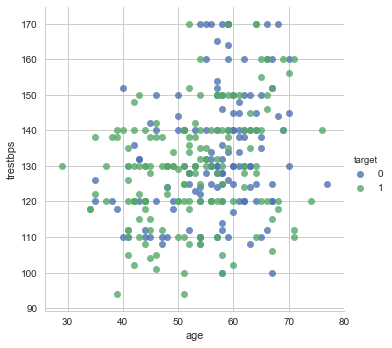

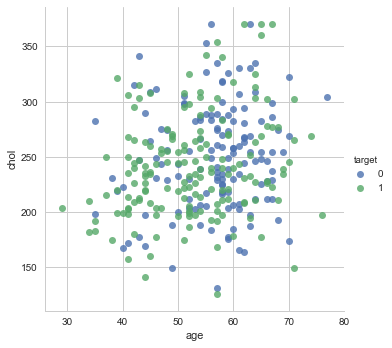

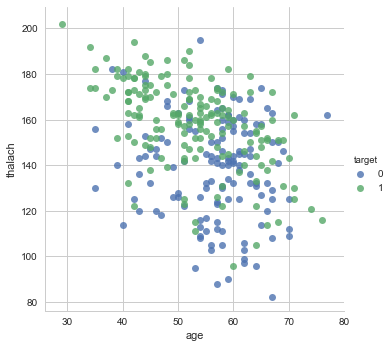

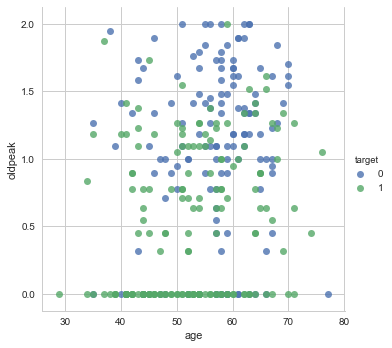

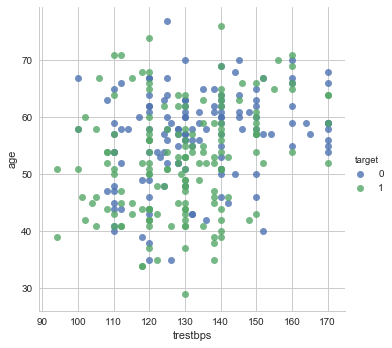

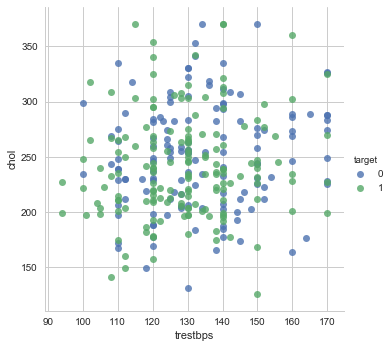

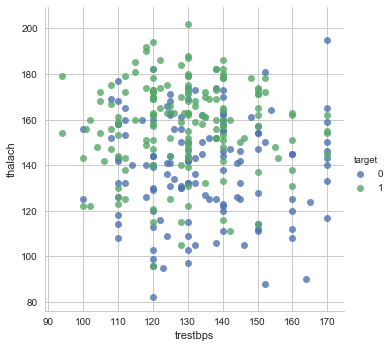

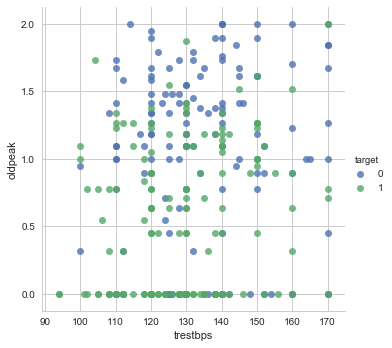

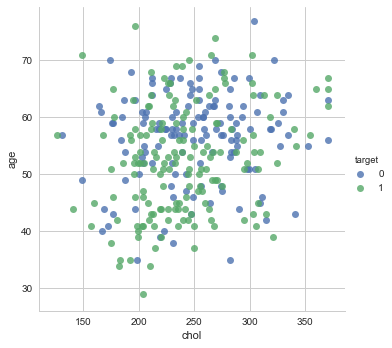

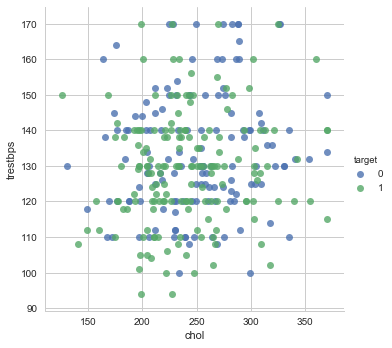

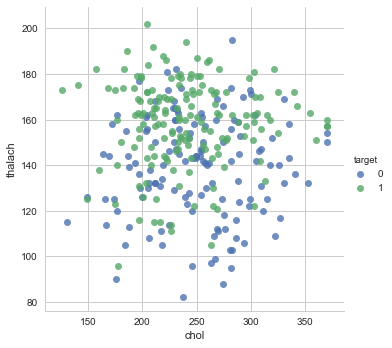

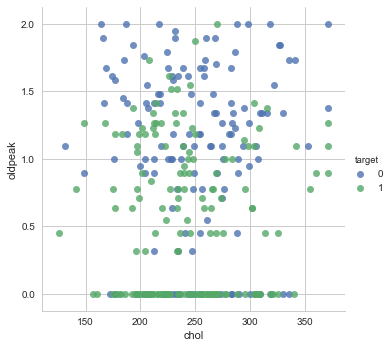

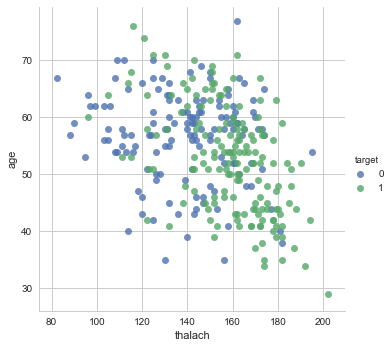

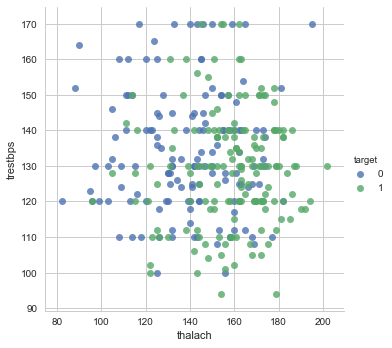

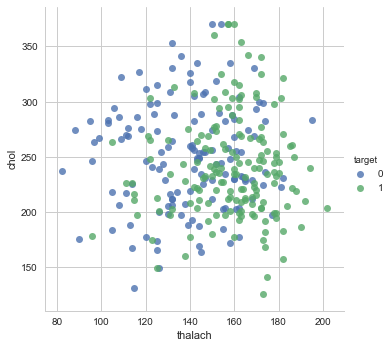

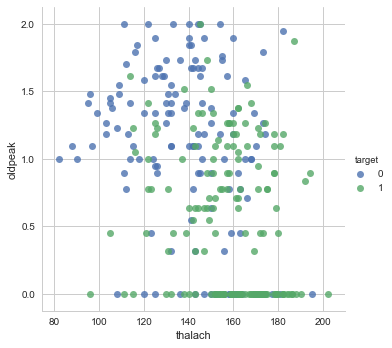

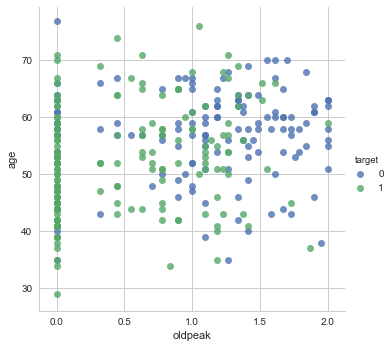

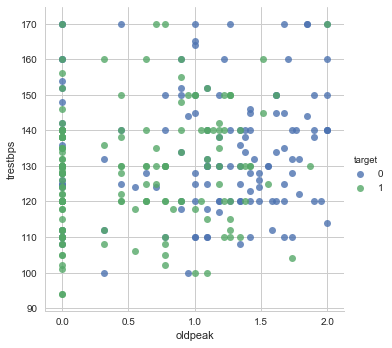

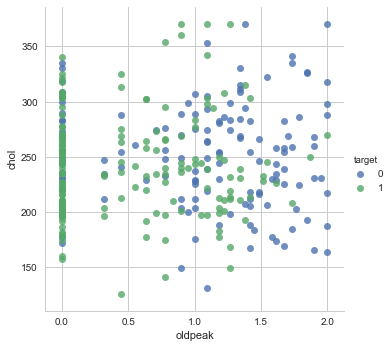

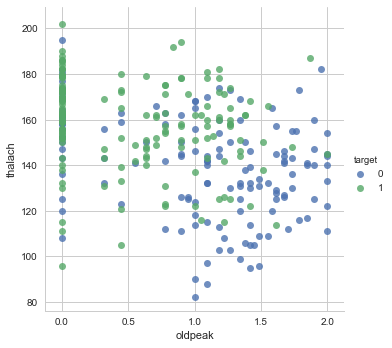

In [60]:
create_scatterplots(df_train, continuous_features)

From the above scatterplots, it can be observed there are multivariate outliers present in the dataset. These multivariate outliers must be dropped from the dataset

In [61]:
df_train = df.drop(df_train[(df_train['trestbps'] > 120) & (df_train['age'] < 30)].index)

In [62]:
df_train = df_train.drop(df_train[(df_train['trestbps'] > 135) & (df_train['age'] > 75)].index)

In [63]:
df_train = df_train.drop(df_train[(df_train['trestbps'] > 190) & (df_train['age'] > 50)].index)

In [64]:
df_train = df_train.drop(df_train[(df['chol'] < 145) & (df_train['age'] > 50)].index)

In [65]:
df_train = df_train.drop(df_train[(df_train['chol'] < 165) & (df_train['age'] > 70)].index)

In [66]:
df_train = df_train.drop(df_train[(df_train['chol'] > 300) & (df_train['age'] > 75)].index)

In [67]:
df_train = df_train.drop(df_train[(df_train['chol'] > 375) & (df_train['age'] > 60)].index)

In [68]:
df_train = df_train.drop(df_train[(df_train['thalach'] < 82) & (df_train['age'] > 65)].index)

In [69]:
df_train = df_train.drop(df_train[(df_train['thalach'] > 160) & (df_train['age'] > 75)].index)

In [70]:
df_train = df_train.drop(df_train[(df_train['thalach'] > 200) & (df_train['age'] < 30)].index)

In [71]:
df_train = df_train.drop(df_train[(df_train['oldpeak'] > 5) & (df_train['age'] > 50)].index)

In [72]:
df_train = df_train.drop(df_train[(df_train['trestbps'] > 150) & (df_train['chol'] > 350)].index)

In [73]:
df_train = df_train.drop(df_train[(df_train['trestbps'] > 125) & (df_train['chol'] < 150)].index)

In [74]:
df_train = df_train.drop(df_train[(df_train['trestbps'] > 150) & (df_train['thalach'] < 100)].index)

In [75]:
df_train = df_train.drop(df_train[(df_train['trestbps'] > 160) & (df_train['thalach'] > 180)].index)

In [76]:
df_train = df_train.drop(df_train[(df_train['trestbps'] > 170) & (df_train['thalach'] < 120)].index)

In [77]:
df_train = df_train.drop(df_train[(df_train['trestbps'] > 125) & (df_train['chol'] < 150)].index)

In [78]:
df_train = df_train.drop(df_train[(df_train['oldpeak'] > 1.5) & (df_train['chol'] > 350)].index)

In [79]:
df_train = df_train.drop(df_train[(df_train['oldpeak'] < 0.5) & (df_train['chol'] < 150)].index)

In [80]:
df_train = df_train.drop(df_train[(df_train['oldpeak'] > 4) & (df_train['trestbps'] > 170)].index)

In [81]:
df_train = df_train.drop(df_train[(df_train['chol'] > 300) & (df_train['trestbps'] > 170)].index)

In [82]:
df_train = df_train.drop(df_train[(df_train['oldpeak'] > 3.7) & (df_train['trestbps'] < 130)].index)

In [83]:
df_train = df_train.drop(df_train[(df_train['oldpeak'] > 3.25) & (df_train['thalach'] > 180)].index)

In [84]:
df_train = df_train.drop(df_train[(df_train['chol'] > 250) & (df_train['age'] < 36)].index)

The **multivariate outliers** have been removed

Data preprocessing may result in elimination of some of the indices because of which the indices order can change. We need to reset the indices

In [85]:
df_train.reset_index(inplace = True, drop = True)

## Feature Selection

In [86]:
from sklearn.ensemble import ExtraTreesClassifier

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [88]:
X = df_train.iloc[:,:-1]

In [89]:
X.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3


In [90]:
Y = df_train.iloc[:,-1]

In [91]:
Y.head(2)

0    0
1    0
Name: target, dtype: int64

In [92]:
bestfeatures = SelectKBest(score_func = chi2)

In [93]:
fit = bestfeatures.fit(X, Y)

In [94]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [95]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)

In [96]:
featureScores.columns = ['Features', 'Score']

In [97]:
featureScores.sort_values(by='Score', ascending=False)

,Features,Score
7,thalach,556.703779
9,oldpeak,221.246006
2,cp,184.674733
11,ca,177.047838
4,chol,122.643181
8,exang,115.829771
0,age,92.125393
3,trestbps,32.598533
10,slope,28.574589
1,sex,22.855590


The features that have high scores are more correlated with the target variable.

The feature **fbs** does not contribute much to the prediction of the target variable and thus these can be removed from the dataset

In [98]:
model = ExtraTreesClassifier()

In [99]:
model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [100]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)

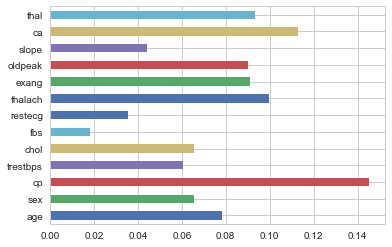

In [101]:
feat_importances.plot(kind='barh')
plt.show()

From the above barplot, it can be observed that the feature **fbs** is not so important features and thus can be removed from the dataset

In [102]:
df_train = df_train.drop(['fbs'], axis = 1)

In [103]:
x_test1 = x_test1.drop(['fbs'], axis = 1)

In [104]:
df_train.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,106,0,1.9,1,3,2,0


## Feature Transformation

The independent features present in the dataset must be in the similar scale otherwise the predictive model will become biased towards certain features

Obtaining the categorical features that are remaining in the dataset after dropping **fbs** feature variable

In [105]:
remaining_categorical_features = [feature for feature in df_train.select_dtypes(np.number).columns if feature in ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']]

In [106]:
df_train[continuous_features].describe()

,age,trestbps,chol,thalach,oldpeak
count,938.000000,938.000000,938.000000,938.000000,938.000000
mean,54.157783,130.373134,242.921109,149.679104,0.972708
std,8.737525,16.097402,43.442920,21.808774,1.036712
min,34.000000,94.000000,141.000000,95.000000,0.000000
25%,47.000000,120.000000,211.000000,133.250000,0.000000
50%,55.000000,130.000000,239.000000,152.000000,0.600000
75%,61.000000,140.000000,271.000000,166.000000,1.600000
max,74.000000,180.000000,354.000000,194.000000,4.200000


It can be observed that the values in different columns have different scales. So we need to bring them under similar scale.

We will create a new dataframe from the independent continuous features of the original dataframe

In [107]:
df_train_continuous_features = df_train[continuous_features]
df_train_continuous_features.head(3)

,age,trestbps,chol,thalach,oldpeak
0,52,125,212,168,1.0
1,53,140,203,155,3.1
2,70,145,174,125,2.6


We will create a dataframe from the target variable

In [108]:
df_train_target = df_train.iloc[:,-1]
df_train_target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [109]:
df_train_target.value_counts()

1    491
0    447
Name: target, dtype: int64

**StandardScaler** must be imported to perform **Standardization**

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
#Instantiating StandardScaler
sc = StandardScaler()

In [112]:
#Fitting the dataframe X onto the standard scaler
df_train_continuous_features_transformed = sc.fit_transform(df_train_continuous_features)

In [113]:
df_train_continuous_features_transformed

array([[-0.24708755, -0.33396697, -0.71214377,  0.84051809,  0.02633969],
       [-0.13257761,  0.59835749, -0.91942268,  0.24410973,  2.05305503],
       [ 1.81409141,  0.90913232, -1.58732141, -1.13221724,  1.57050376],
       ...,
       [-0.81963726, -1.26629144,  0.73880865, -1.4533602 ,  0.02633969],
       [-0.47610744, -1.26629144,  0.25515784,  0.42762   , -0.93876286],
       [-0.01806767, -0.6447418 , -1.26488754, -1.68274803,  0.4123807 ]])

The continuous features have been scaled

In [114]:
df_train_continuous_features_scaled = pd.DataFrame({'age': df_train_continuous_features_transformed[:, 0], 'trestbps': df_train_continuous_features_transformed[:, 1], 'chol': df_train_continuous_features_transformed[:, 2], 'thalach': df_train_continuous_features_transformed[:, 3], 'oldpeak': df_train_continuous_features_transformed[:, 4]})

In [115]:
df_train_continuous_features_scaled.head()

,age,trestbps,chol,thalach,oldpeak
0,-0.247088,-0.333967,-0.712144,0.840518,0.026340
1,-0.132578,0.598357,-0.919423,0.244110,2.053055
2,1.814091,0.909132,-1.587321,-1.132217,1.570504
3,0.783502,1.095597,-0.919423,0.519375,-0.938763
4,0.898012,0.474048,1.176397,-2.003891,0.894932


A dataset of the scaled features has been obtained

In [116]:
df_train_continuous_features_scaled.shape

(938, 5)

In [117]:
df_train_categorical_features = df_train[remaining_categorical_features]

In [118]:
df_train_categorical_features.head(3)

,sex,cp,restecg,exang,slope,ca,thal
0,1,0,1,0,2,2,3
1,1,0,0,1,0,0,3
2,1,0,1,1,0,0,3


In [119]:
df_train_categorical_features.shape

(938, 7)

In [120]:
#Joining the dataframes
df_final = df_train_continuous_features_scaled.join(df_train_categorical_features, how='inner')

In [121]:
df_final.head()

,age,trestbps,chol,thalach,oldpeak,sex,cp,restecg,exang,slope,ca,thal
0,-0.247088,-0.333967,-0.712144,0.840518,0.026340,1,0,1,0,2,2,3
1,-0.132578,0.598357,-0.919423,0.244110,2.053055,1,0,0,1,0,0,3
2,1.814091,0.909132,-1.587321,-1.132217,1.570504,1,0,1,1,0,0,3
3,0.783502,1.095597,-0.919423,0.519375,-0.938763,1,0,1,0,2,1,3
4,0.898012,0.474048,1.176397,-2.003891,0.894932,0,0,1,0,1,3,2


In [122]:
df_final.shape

(938, 12)

In [123]:
df_final.to_csv('heart_df_saved.csv', index=False)

In [124]:
df_final = pd.read_csv('heart_df_saved.csv')

In [125]:
df_final.head()

,age,trestbps,chol,thalach,oldpeak,sex,cp,restecg,exang,slope,ca,thal
0,-0.247088,-0.333967,-0.712144,0.840518,0.026340,1,0,1,0,2,2,3
1,-0.132578,0.598357,-0.919423,0.244110,2.053055,1,0,0,1,0,0,3
2,1.814091,0.909132,-1.587321,-1.132217,1.570504,1,0,1,1,0,0,3
3,0.783502,1.095597,-0.919423,0.519375,-0.938763,1,0,1,0,2,1,3
4,0.898012,0.474048,1.176397,-2.003891,0.894932,0,0,1,0,1,3,2


## Bulding a RandomForestClassifier

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
classifier_RF = RandomForestClassifier()

In [128]:
trained_model_RF = classifier_RF.fit(df_final, Y)

In [129]:
trained_model_RF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Applying K fold cross validation on Random Forest model

In [130]:
from sklearn.model_selection import cross_val_score

In [131]:
accuracy_scores_RF = cross_val_score(trained_model_RF, df_final, Y, scoring='accuracy', cv = 10)

In [132]:
accuracy_scores_RF

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.96808511, 1.        , 1.        , 0.95698925])

In [133]:
accuracy_scores_RF.mean()

0.9925074353694807

# Prediction using Random Forest model

In [134]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [135]:
y_pred_RF = trained_model_RF.predict(x_test1)

In [136]:
accuracy_score(y_test1, y_pred_RF)*100

54.36893203883495

## Hyperparameter tuning

In [137]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


**n_estimators** is an argument used whenever creating a random forest. It specifies how many decision trees we need in the forest.

In [138]:
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [139]:
from sklearn.model_selection import RandomizedSearchCV

In [140]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

The above are the various parameters that we have considered. RandomizedSearchCV will select the best parameters amongst these.

In [141]:
rfc = RandomForestClassifier()
rsc = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, scoring = 'accuracy', n_iter = 10, cv = 5, random_state = 42, verbose = 2)

In [143]:
#rsc.fit(df_final, Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=2)

Importing **pickle** module to save the model

In [145]:
import pickle

In [146]:
filename = 'finalized_model.sav'
pickle.dump(rsc, open(filename, 'wb'))

In [147]:
loaded_model = pickle.load(open(filename, 'rb'))

In [148]:
loaded_model.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

The above are the best hyperparameters obtained for RandomForestClassifier using RandomizedSearchCV

In [149]:
prediction = rsc.predict(x_test1)

In [150]:
prediction

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [151]:
print(accuracy_score(y_test1, prediction))

0.6893203883495146


In [152]:
print(confusion_matrix(y_test1, prediction))

[[32 18]
 [14 39]]


In [153]:
print(classification_report(y_test1, prediction))

             precision    recall  f1-score   support

          0       0.70      0.64      0.67        50
          1       0.68      0.74      0.71        53

avg / total       0.69      0.69      0.69       103

